# 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
import pandas as pd
k_obe_df = pd.read_csv("/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_FCVC_updatae_del_CH2O_3835.csv")
k_obe_df.head()

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad,BMI,HE_BMI_pct
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4,25.5066412139419,
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3,23.0757106243309,
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2,21.9111753591992,
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2,18.5816940299816,
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4,27.8705421052436,


In [3]:
import numpy as np
import pandas as pd

def obe(row):
    # 사실 row['NObeyesdad']에 값이 없으면 계산, 아니면 row['NObeyesdad'] 값을 그대로 리턴하도록 구성하고 싶었는데
    # row['NObeyesdad'] == np.NaN이나 None이 안먹힘... 왠지 아시는분?
    # 공백이라서 그런가? (if row['NObeyesdad'] == "":)

    # pd.isna() 써야하는 것 아닐런지여. ==np.NaN이면 누락된 값을 찾고 싶으신 것 같은데 그럼 아예 pd.isna() 함수를 따로 쓰심은 어떠신지요?
    # if not pd.isna(row['NObeyesdad']):
    #     return row['NObeyesdad']
    if row['NObeyesdad'] == 1:                      # 비만 유병여부 값이 있으면 그대로 사용  # NObeyesdad 값이 NaN이 아니면 그대로 반환
        return 1
    elif row['NObeyesdad'] == 2:
        return 2
    elif row['NObeyesdad'] == 3:
        return 3
    elif row['NObeyesdad'] == 4:
        return 4
    elif row['NObeyesdad'] == 5:
        return 5
    elif row['NObeyesdad'] == 6:
        return 6
    else:                                           # 비만 유병여부 값이 없으면
        if row['Age'] >= 12 and row['Age'] <= 18:   # 12세 이상 18세 미만일 경우
            if row['HE_BMI_pct'] == 1:              # 체질량지수 백분위수가 95 미만이면 분류 그대로 값 반환
                return 1
            elif row['HE_BMI_pct'] == 2:
                return 2
            elif row['HE_BMI_pct'] == 3:
                return 3
            elif row['HE_BMI_pct'] == 4:            # 체질량지수 백분위수가 95 이상일 경우 성별 및 나이에 따라 체질량 백분위수로 N단계 비만을 나눠야 함
                if row['Gender'] == 1:
                    if row['Age'] == 12:
                        if row['HE_BMI'] >= 35.49:
                            return 6
                        elif row['HE_BMI'] >= 30.42:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 13:
                        if row['HE_BMI'] >= 36.19:
                            return 6
                        elif row['HE_BMI'] >= 31.02:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 14:
                        if row['HE_BMI'] >= 36.54:
                            return 6
                        elif row['HE_BMI'] >= 31.32:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 15:
                        if row['HE_BMI'] >= 36.82:
                            return 6
                        elif row['HE_BMI'] >= 31.56:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 16:
                        if row['HE_BMI'] >= 37.10:
                            return 6
                        elif row['HE_BMI'] >= 31.80:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 17:
                        if row['HE_BMI'] >= 37.38:
                            return 6
                        elif row['HE_BMI'] >= 32.04:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 18:
                        if row['HE_BMI'] >= 37.73:
                            return 6
                        elif row['HE_BMI'] >= 32.34:
                            return 5
                        else:
                            return 4
                elif row['Gender'] == 0:
                    if row['Age'] == 12:
                        if row['HE_BMI'] >= 34.16:
                            return 6
                        elif row['HE_BMI'] >= 29.28:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 13:
                        if row['HE_BMI'] >= 35.00:
                            return 6
                        elif row['HE_BMI'] >= 30.00:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 14:
                        if row['HE_BMI'] >= 35.42:
                            return 6
                        elif row['HE_BMI'] >= 30.36:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 15:
                        if row['HE_BMI'] >= 35.63:
                            return 6
                        elif row['HE_BMI'] >= 30.54:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 16:
                        if row['HE_BMI'] >= 35.70:
                            return 6
                        elif row['HE_BMI'] >= 30.60:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 17:
                        if row['HE_BMI'] >= 35.70:
                            return 6
                        elif row['HE_BMI'] >= 30.60:
                            return 5
                        else:
                            return 4
                    if row['Age'] == 18:
                        if row['HE_BMI'] >= 35.63:
                            return 6
                        elif row['HE_BMI'] >= 30.54:
                            return 5
                        else:
                            return 4
            else:                                   # 만약에 체질량지수 백분위수 값이 1-4에 해당하지 않는다면 직접 BMI를 계산해서 위와 유사하게 분류
                BMI = row['Weight'] / (row['Height'] ** 2)
                if row['Gender'] == 1:
                    if row['Age'] == 12:
                        if BMI >= 35.49:
                            return 6
                        elif BMI >= 30.42:
                            return 5
                        elif BMI >= 25.35:
                            return 4
                        elif BMI >= 23.25:
                            return 3
                        elif BMI < 15.75:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 13:
                        if BMI >= 36.19:
                            return 6
                        elif BMI >= 31.02:
                            return 5
                        elif BMI >= 25.85:
                            return 4
                        elif BMI >= 23.75:
                            return 3
                        elif BMI < 16.25:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 14:
                        if BMI >= 36.54:
                            return 6
                        elif BMI >= 31.32:
                            return 5
                        elif BMI >= 26.10:
                            return 4
                        elif BMI >= 24.05:
                            return 3
                        elif BMI < 16.75:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 15:
                        if BMI >= 36.82:
                            return 6
                        elif BMI >= 31.56:
                            return 5
                        elif BMI >= 26.30:
                            return 4
                        elif BMI >= 24.35:
                            return 3
                        elif BMI < 17.25:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 16:
                        if BMI >= 37.10:
                            return 6
                        elif BMI >= 31.80:
                            return 5
                        elif BMI >= 26.50:
                            return 4
                        elif BMI >= 24.65:
                            return 3
                        elif BMI < 17.70:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 17:
                        if BMI >= 37.38:
                            return 6
                        elif BMI >= 32.04:
                            return 5
                        elif BMI >= 26.70:
                            return 4
                        elif BMI >= 24.95:
                            return 3
                        elif BMI < 18.05:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 18:
                        if BMI >= 37.73:
                            return 6
                        elif BMI >= 32.34:
                            return 5
                        elif BMI >= 26.95:
                            return 4
                        elif BMI >= 25.25:
                            return 3
                        elif BMI < 18.45:
                            return 1
                        else:
                            return 2
                elif row['Gender'] == 0:
                    if row['Age'] == 12:
                        if BMI >= 34.16:
                            return 6
                        elif BMI >= 29.28:
                            return 5
                        elif BMI >= 24.40:
                            return 4
                        elif BMI >= 22.40:
                            return 3
                        elif BMI < 15.55:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 13:
                        if BMI >= 35.00:
                            return 6
                        elif BMI >= 30.00:
                            return 5
                        elif BMI >= 25.00:
                            return 4
                        elif BMI >= 23.00:
                            return 3
                        elif BMI < 16.15:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 14:
                        if BMI >= 35.42:
                            return 6
                        elif BMI >= 30.36:
                            return 5
                        elif BMI >= 25.30:
                            return 4
                        elif BMI >= 23.45:
                            return 3
                        elif BMI < 16.65:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 15:
                        if BMI >= 35.63:
                            return 6
                        elif BMI >= 30.54:
                            return 5
                        elif BMI >= 25.45:
                            return 4
                        elif BMI >= 23.70:
                            return 3
                        elif BMI < 17.10:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 16:
                        if BMI >= 35.70:
                            return 6
                        elif BMI >= 30.60:
                            return 5
                        elif BMI >= 25.50:
                            return 4
                        elif BMI >= 23.80:
                            return 3
                        elif BMI < 17.40:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 17:
                        if BMI >= 35.70:
                            return 6
                        elif BMI >= 30.60:
                            return 5
                        elif BMI >= 25.50:
                            return 4
                        elif BMI >= 23.75:
                            return 3
                        elif BMI < 17.55:
                            return 1
                        else:
                            return 2
                    if row['Age'] == 18:
                        if BMI >= 35.63:
                            return 6
                        elif BMI >= 30.54:
                            return 5
                        elif BMI >= 25.45:
                            return 4
                        elif BMI >= 23.65:
                            return 3
                        elif BMI < 17.65:
                            return 1
                        else:
                            return 2
        else:                                       # 19세 이상 성인일 경우 일반적인 분류법을 따름
            BMI = row['Weight'] / (row['Height'] ** 2)
            if BMI >= 35:
                return 6
            elif BMI >= 30:
                return 5
            elif BMI >= 25:
                return 4
            elif BMI >= 23:
                return 3
            elif BMI < 18.5:
                return 1
            else:
                return 2

# 계산된 비만도 범위를 넣은 csv 생성
k_obe_df['NObeyesdad'] = k_obe_df.apply(obe, axis=1) # 위 함수를 사용해서 컬럼 생성/수정
k_obe_df.to_csv('/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_FCVC_updatae_del_CH2O_3835_AddedObe.csv', index=False)

In [4]:
k_obe_df = pd.read_csv('/content/drive/MyDrive/KDT/프로젝트/세미 프로젝트/data/K_Obestiy_240227_AddedObe.csv')
k_obe_df

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad,BMI,HE_BMI_pct
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4,25.5066412139419,
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3,23.0757106243309,
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2,21.9111753591992,
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2,18.5816940299816,
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4,27.8705421052436,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.000000,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2,20.8270510150813,
3831,0,62,3,0,0.000000,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3,24.2997964892044,
3832,1,62,0,1,0.000000,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4,25.1787117125985,
3833,0,64,1,0,0.000000,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3,24.9291775805428,


In [5]:
k_obe = k_obe_df.drop(['BMI', 'HE_BMI_pct'], axis=1)
k_obe

,Gender,Age,CALC,SMOKE,FAF_Time,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.000000,0.0,1.793,82.0,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.000000,0.0,1.599,59.0,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.000000,4.0,1.697,63.1,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.000000,0.0,1.722,55.1,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,0.237481,2.0,1.798,90.1,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.000000,0.0,1.717,61.4,2,2.571429,1,3.0,0,3.000000,2
3831,0,62,3,0,0.000000,0.0,1.633,64.8,1,2.571429,1,3.0,0,3.500000,3
3832,1,62,0,1,0.000000,0.0,1.647,68.3,1,2.214286,1,3.0,0,2.000000,4
3833,0,64,1,0,0.000000,0.0,1.596,63.5,1,2.571429,0,3.0,0,7.500000,3


# GBM

## 데이터 분할

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    k_obe.drop(['NObeyesdad', 'FAF_Time'], axis=1),
    k_obe['NObeyesdad'],
    random_state=42,
    stratify=k_obe['NObeyesdad']
)

In [30]:
X_train

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O
198,0,48,3,0,4.0,1.616,55.8,4,2.571429,0,3.0,0,7.500000
3622,0,62,1,0,0.0,1.543,62.2,2,2.571429,0,3.0,1,3.000000
654,0,40,1,0,0.0,1.549,44.7,4,2.571429,1,3.0,1,3.000000
471,0,37,2,0,5.0,1.635,57.2,2,1.928571,0,3.0,0,8.000000
1937,0,30,1,0,3.0,1.577,59.7,3,2.143449,1,3.0,0,5.370184
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0,42,1,0,0.0,1.552,52.8,3,2.143449,1,3.0,0,5.421368
1294,0,53,1,0,0.0,1.612,83.9,1,1.714286,1,3.0,0,10.000000
860,1,29,1,1,0.0,1.726,87.5,4,2.143449,1,3.0,0,5.438227
3507,1,63,2,0,0.0,1.688,73.6,2,2.571429,1,3.0,0,7.500000


## 디폴트값 분석
디폴트 값
- n_estimators=100
- learning_rate=0.01

In [82]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.01
)

gb_clf.fit(X_train, y_train)
gbm_pred =  gb_clf.predict(X_test)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Training time: 4.108591318130493 seconds


In [83]:
# 오차행렬
from sklearn.metrics import confusion_matrix

y_matrix = confusion_matrix(y_test, gbm_pred)
print("오차 행렬 : \n{}".format(y_matrix))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(gbm_pred, y_test)
precision = precision_score(gbm_pred, y_test, average='macro')
recall = recall_score(gbm_pred, y_test, average='macro')
f1 = f1_score(gbm_pred, y_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 20  29   0   0   0   0]
 [  3 373   8   2   0   0]
 [  0  68  96  36   0   0]
 [  0   6   2 252   2   0]
 [  0   0   0  17  33   3]
 [  0   0   0   0   3   6]]
정확도 : 0.8133472367049009
정밀도 : 0.684270790999795
재현율 : 0.8191289441606086
F1 : 0.721023610224853


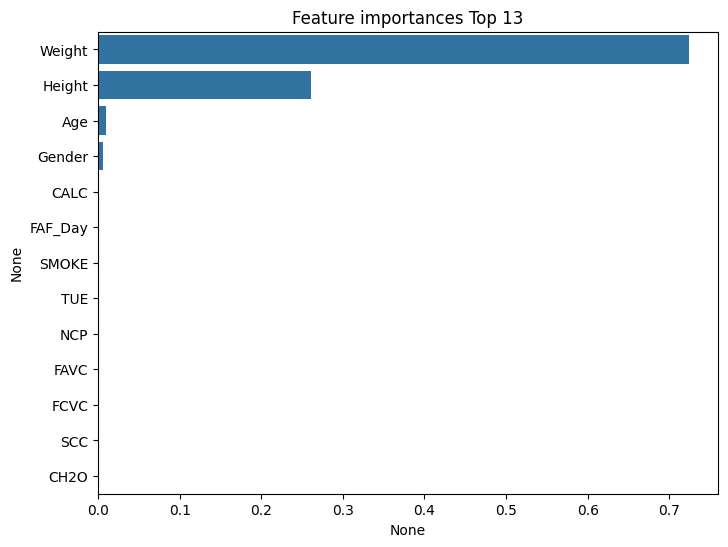

In [84]:
# 특성 중요도

import matplotlib.pyplot as plt
import seaborn as sns

def plot_feature_importance(gb_clf, columns, limit=None):
    ftr_importances_values = gb_clf.feature_importances_
    # Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
    ftr_importances = pd.Series(ftr_importances_values, index=columns)
    # 중요도값 순으로 Series를 정렬
    ftr_top = ftr_importances.sort_values(ascending=False)[:limit]
    plt.figure(figsize=(8,6))
    plt.title(f'Feature importances Top {len(columns) if limit is None else limit}')
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.show()

# plot_feature_importance 함수 호출
plot_feature_importance(gb_clf, X_train.columns)


- 참고1 : https://m.blog.naver.com/nilsine11202/221577750855
- 참고2 : https://www.kaggle.com/code/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy/notebook

→ SMOTE 관련해 오버샘플링 후 모델링 비교

→ class_weight를 주고 모델링 비교

→ 피처 중요도가 높은 Height, Weight 제거 후 나머지 피처 중요도 확인하기

### 그리드서치 적용

In [85]:
from sklearn.model_selection import GridSearchCV

start_time = time.time()

gb_param_grid={
    'n_estimators' : [50, 100, 500, 1000],
    'learning_rate' : [0.01,0.05, 0.75, 0.1],
}

gb_grid=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
)

gb_grid.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_macro : {0: .4f}".format(gb_grid.best_score_))
print("best param : ",gb_grid.best_params_)

Training time: 373.77993607521057 seconds
best f1_macro :  0.8712
best param :  {'learning_rate': 0.05, 'n_estimators': 500}


In [86]:
# 그리드서치2

start_time = time.time()

gb_param_grid={
    'n_estimators' : [250, 500, 750],
    'learning_rate' : [0.03,0.05, 0.07],
}

gb_grid2=GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid = gb_param_grid,
    scoring="f1_macro",
    cv=3,
    n_jobs=-1,
)

gb_grid2.fit(X_train, y_train)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

print("best f1_macro : {0: .4f}".format(gb_grid2.best_score_))
print("best param : ",gb_grid2.best_params_)

Training time: 290.7391014099121 seconds
best f1_macro :  0.8712
best param :  {'learning_rate': 0.05, 'n_estimators': 500}


In [88]:
# 최적의 모델 지정
estimator = gb_grid2.best_estimator_
grid_pred = estimator.predict(X_test)

# 성능 평가
grid_matrix = confusion_matrix(y_test, grid_pred)
print("오차 행렬 : \n{}".format(grid_matrix))

# 성능 평가하기
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(grid_pred, y_test)
precision = precision_score(grid_pred, y_test, average='macro')
recall = recall_score(grid_pred, y_test, average='macro')
f1 = f1_score(grid_pred, y_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 42   7   0   0   0   0]
 [  4 369  13   0   0   0]
 [  0  10 185   5   0   0]
 [  0   0  10 248   4   0]
 [  0   0   0   7  43   3]
 [  0   0   0   0   3   6]]
정확도 : 0.9311783107403545
정밀도 : 0.8604422855409145
재현율 : 0.8731563208199277
F1 : 0.8664735857491999


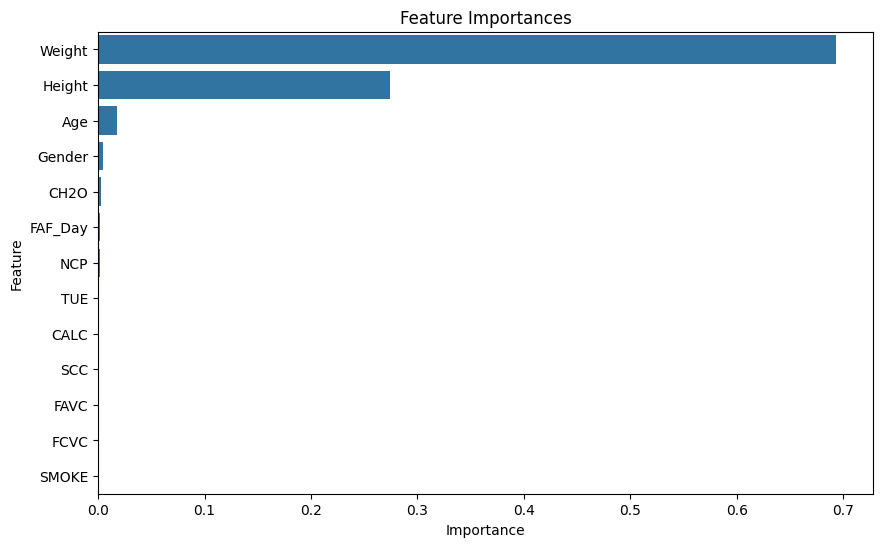

In [89]:
# 특성 중요도
def plot_feature_importance(estimator, columns):
    ftr_importances_values = estimator.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=columns)
    ftr_top = ftr_importances.sort_values(ascending=False)[:]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances')
    sns.barplot(x=ftr_top, y=ftr_top.index)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# 특성 중요도 그리기
plot_feature_importance(estimator, X_test.columns)


# GBM 몸무게, 신장 피처 제외하고 다시 돌려보기

In [38]:
new_k_obe = k_obe.drop(['Weight', 'Height', 'FAF_Time'], axis=1)
new_k_obe

,Gender,Age,CALC,SMOKE,FAF_Day,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.0,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.0,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.0,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.0,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,2.0,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.0,2,2.571429,1,3.0,0,3.000000,2
3831,0,62,3,0,0.0,1,2.571429,1,3.0,0,3.500000,3
3832,1,62,0,1,0.0,1,2.214286,1,3.0,0,2.000000,4
3833,0,64,1,0,0.0,1,2.571429,0,3.0,0,7.500000,3


In [90]:
from sklearn.model_selection import train_test_split

New_train, New_test, new_train, new_test = train_test_split(
    new_k_obe.drop("NObeyesdad", axis=1),
    new_k_obe['NObeyesdad'],
    random_state=42,
    stratify=new_k_obe['NObeyesdad']
)
New_train

,Gender,Age,CALC,SMOKE,FAF_Day,TUE,NCP,FAVC,FCVC,SCC,CH2O
3156,1,16,0,0,3.0,4,1.714286,1,3.0,0,1.000000
1459,1,39,1,0,0.0,4,2.143449,1,3.0,0,5.400371
505,0,58,0,0,0.0,2,1.500000,0,3.0,0,4.000000
1758,1,43,2,0,0.0,4,2.143449,1,3.0,0,5.381382
3046,1,31,1,0,0.0,4,2.214286,0,3.0,0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...
2817,0,25,2,0,0.0,4,1.928571,1,2.0,0,1.500000
2496,1,45,2,0,2.0,2,2.571429,1,3.0,0,7.500000
2981,0,42,1,0,0.0,4,1.714286,1,3.0,0,1.000000
2534,1,59,0,0,5.0,1,2.143449,1,3.0,0,5.332632


In [91]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

new_gb_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05
)

new_gb_clf.fit(New_train, new_train)
new_gb_pred =  new_gb_clf.predict(New_test)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Training time: 18.38927412033081 seconds


In [92]:
# 오차행렬
from sklearn.metrics import confusion_matrix

new_matrix = confusion_matrix(new_test, new_gb_pred)
print("오차 행렬 : \n{}".format(new_matrix))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(new_gb_pred, new_test)
precision = precision_score(new_gb_pred, new_test, average='macro')
recall = recall_score(new_gb_pred, new_test, average='macro')
f1 = f1_score(new_gb_pred, new_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[  0  37   5   7   0   0]
 [  5 256  39  83   3   0]
 [  1  98  23  74   3   1]
 [  2 112  43  99   4   2]
 [  0  27   5  19   1   1]
 [  0   2   2   5   0   0]]
정확도 : 0.39520333680917624
정밀도 : 0.19582382586355165
재현율 : 0.185606838366787
F1 : 0.1824583920987639


역시 중요변수를 빼니 성능이 확 낮아지는 걸 확인할 수 있음..

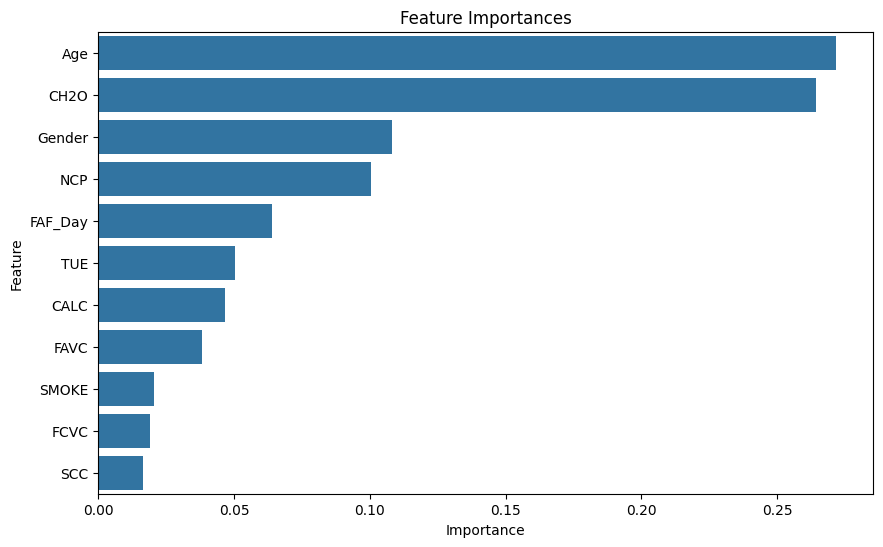

In [93]:
# 특성 중요도

import matplotlib.pyplot as plt
import seaborn as sns

ftr_importances_values = new_gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=New_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# Weight만 삭제하고 돌려보기

In [54]:
new2_k_obe = k_obe.drop(['Weight', 'FAF_Time'], axis=1)
new2_k_obe

,Gender,Age,CALC,SMOKE,FAF_Day,Height,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.0,1.793,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.0,1.599,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.0,1.697,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.0,1.722,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,2.0,1.798,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.0,1.717,2,2.571429,1,3.0,0,3.000000,2
3831,0,62,3,0,0.0,1.633,1,2.571429,1,3.0,0,3.500000,3
3832,1,62,0,1,0.0,1.647,1,2.214286,1,3.0,0,2.000000,4
3833,0,64,1,0,0.0,1.596,1,2.571429,0,3.0,0,7.500000,3


In [94]:
from sklearn.model_selection import train_test_split

New2_train, New2_test, new2_train, new2_test = train_test_split(
    new2_k_obe.drop("NObeyesdad", axis=1),
    new2_k_obe['NObeyesdad'],
    random_state=42,
    stratify=new2_k_obe['NObeyesdad']
)
New2_train

,Gender,Age,CALC,SMOKE,FAF_Day,Height,TUE,NCP,FAVC,FCVC,SCC,CH2O
3156,1,16,0,0,3.0,1.673,4,1.714286,1,3.0,0,1.000000
1459,1,39,1,0,0.0,1.749,4,2.143449,1,3.0,0,5.400371
505,0,58,0,0,0.0,1.584,2,1.500000,0,3.0,0,4.000000
1758,1,43,2,0,0.0,1.772,4,2.143449,1,3.0,0,5.381382
3046,1,31,1,0,0.0,1.814,4,2.214286,0,3.0,0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0,25,2,0,0.0,1.617,4,1.928571,1,2.0,0,1.500000
2496,1,45,2,0,2.0,1.742,2,2.571429,1,3.0,0,7.500000
2981,0,42,1,0,0.0,1.578,4,1.714286,1,3.0,0,1.000000
2534,1,59,0,0,5.0,1.758,1,2.143449,1,3.0,0,5.332632


In [99]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

new2_gb_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05
)

new2_gb_clf.fit(New2_train, new2_train)
new2_gbm_pred =  new2_gb_clf.predict(New2_test)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Training time: 15.01384973526001 seconds


In [100]:
# 오차행렬
from sklearn.metrics import confusion_matrix

new2_matrix = confusion_matrix(new2_test, new2_gbm_pred)
print("오차 행렬 : \n{}".format(new2_matrix))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(new2_gbm_pred, new2_test)
precision = precision_score(new2_gbm_pred, new2_test, average='macro')
recall = recall_score(new2_gbm_pred, new2_test, average='macro')
f1 = f1_score(new2_gbm_pred, new2_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[  1  37   5   5   1   0]
 [  1 262  42  80   1   0]
 [  3  99  31  66   1   0]
 [  1 106  45 107   2   1]
 [  0  24   8  20   1   0]
 [  0   3   2   3   1   0]]
정확도 : 0.4191866527632951
정밀도 : 0.21357158517373856
재현율 : 0.23613301622339689
F1 : 0.20356975688467405


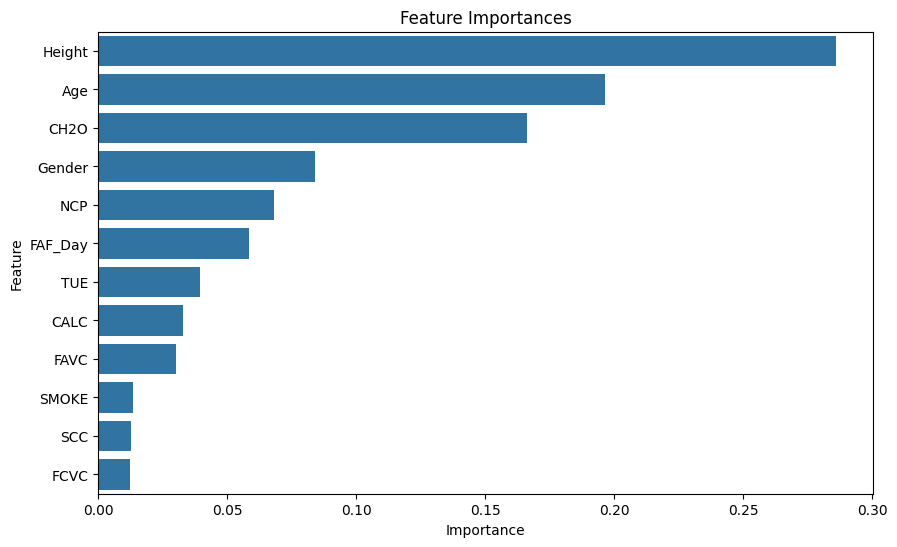

In [101]:
# 특성 중요도
ftr_importances_values = new2_gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=New2_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


확실히 Height만 제외하는것이 더 좋을것 같다는 결론..

# 아쉬워서 Height만 삭제한 데이터 돌려보기

In [60]:
new3_k_obe = k_obe.drop(['Height', 'FAF_Time'], axis=1)
new3_k_obe

,Gender,Age,CALC,SMOKE,FAF_Day,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O,NObeyesdad
0,1,57,3,0,0.0,82.0,4,2.571429,1,3.0,0,3.000000,4
1,0,39,3,0,0.0,59.0,4,1.714286,1,3.0,0,2.000000,3
2,0,19,1,0,4.0,63.1,4,1.357143,1,2.0,0,2.000000,2
3,1,50,1,0,0.0,55.1,4,2.143449,1,3.0,0,5.492455,2
4,1,49,3,0,2.0,90.1,4,1.714286,0,3.0,1,5.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,1,62,3,1,0.0,61.4,2,2.571429,1,3.0,0,3.000000,2
3831,0,62,3,0,0.0,64.8,1,2.571429,1,3.0,0,3.500000,3
3832,1,62,0,1,0.0,68.3,1,2.214286,1,3.0,0,2.000000,4
3833,0,64,1,0,0.0,63.5,1,2.571429,0,3.0,0,7.500000,3


In [102]:
from sklearn.model_selection import train_test_split

New3_train, New3_test, new3_train, new3_test = train_test_split(
    new3_k_obe.drop("NObeyesdad", axis=1),
    new3_k_obe['NObeyesdad'],
    random_state=42,
    stratify=new3_k_obe['NObeyesdad']
)
New3_train

,Gender,Age,CALC,SMOKE,FAF_Day,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O
3156,1,16,0,0,3.0,42.2,4,1.714286,1,3.0,0,1.000000
1459,1,39,1,0,0.0,78.5,4,2.143449,1,3.0,0,5.400371
505,0,58,0,0,0.0,90.2,2,1.500000,0,3.0,0,4.000000
1758,1,43,2,0,0.0,77.5,4,2.143449,1,3.0,0,5.381382
3046,1,31,1,0,0.0,80.6,4,2.214286,0,3.0,0,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2817,0,25,2,0,0.0,47.1,4,1.928571,1,2.0,0,1.500000
2496,1,45,2,0,2.0,83.0,2,2.571429,1,3.0,0,7.500000
2981,0,42,1,0,0.0,57.6,4,1.714286,1,3.0,0,1.000000
2534,1,59,0,0,5.0,94.2,1,2.143449,1,3.0,0,5.332632


In [104]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start_time = time.time()

new3_gb_clf = GradientBoostingClassifier(
    n_estimators=500,
    learning_rate=0.05
)

new3_gb_clf.fit(New3_train, new3_train)
new3_gbm_pred =  new3_gb_clf.predict(New3_test)

end_time = time.time()

# 학습 소요 시간 계산
training_time = end_time - start_time
print("Training time:", training_time, "seconds")

Training time: 23.409565448760986 seconds


In [105]:
# 오차행렬
from sklearn.metrics import confusion_matrix

new3_matrix = confusion_matrix(new3_test, new3_gbm_pred)
print("오차 행렬 : \n{}".format(new3_matrix))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(new3_gbm_pred, new3_test)
precision = precision_score(new3_gbm_pred, new3_test, average='macro')
recall = recall_score(new3_gbm_pred, new3_test, average='macro')
f1 = f1_score(new3_gbm_pred, new3_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 24  25   0   0   0   0]
 [ 15 308  53  10   0   0]
 [  0  56  93  51   0   0]
 [  0  14  46 186  16   0]
 [  0   0   0  19  26   8]
 [  0   0   0   0   4   5]]
정확도 : 0.6694473409801877
정밀도 : 0.5847947728201309
재현율 : 0.5855180836132569
F1 : 0.5808371472412753


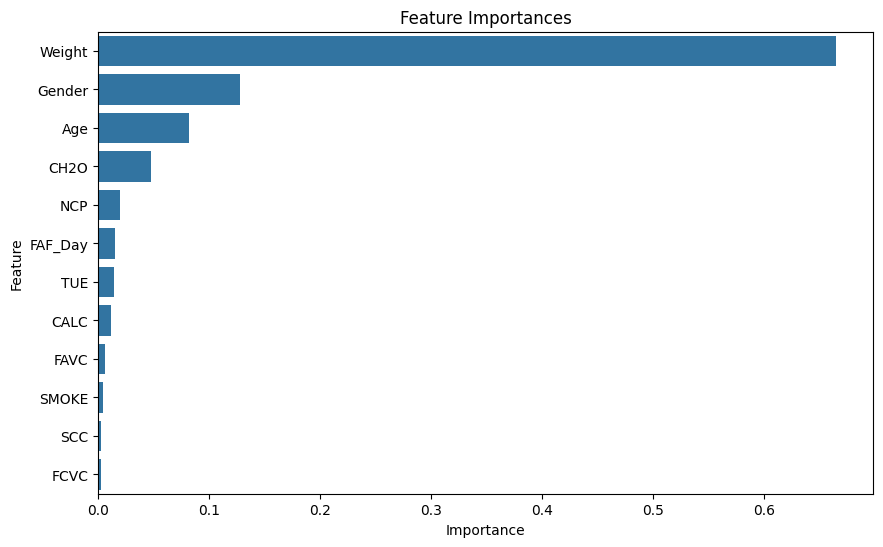

In [106]:
# 특성 중요도
ftr_importances_values = new3_gb_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=New3_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


## LGBM
**장점**   
1. 빠른 학습과 예측 수행 시간
2. 작은 메모리 사용량
3. 카테고리형 피처의 자동 변환
  - 원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분활을 수행

> 이에, LGBM은 따로 정규화를 작용하지 않아도 잘 작동된다는 것을 확인함. 물론 데이터에 따라서 정규화가 성능을 더 향상시킬수도 있음

**파이썬 래퍼 vs 싸이킷런 래퍼**   
사이킷런 래퍼 클래스가 파이썬 래퍼 클래스의 역할을 충분히 수용하 ㄹ수 있으며 사이킷런 프레임워크와도 잘 통합되기 때문에 사실상 `사이킷런에 익순한 사람이라면 별도의 파이썬 래퍼 클래스를 사용하지 않아도 됨`

In [76]:
!pip install lightgbm==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 4.1.0
    Uninstalling lightgbm-4.1.0:
      Successfully uninstalled lightgbm-4.1.0


In [107]:
import lightgbm

print(lightgbm.__version__)

3.3.2


# 피처 삭제없이 다해보기

In [109]:
import warnings
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd

warnings.filterwarnings('ignore')

L_train, L_test, l_train, l_test = train_test_split(
    k_obe.drop(['NObeyesdad', 'FAF_Time'], axis=1),
    k_obe['NObeyesdad'],
    random_state=42,
    stratify=k_obe['NObeyesdad']
)

L_train, L_valid, l_train, l_valid = train_test_split(
    L_train,
    l_train,
    random_state=42,
    stratify=l_train
)

L_train.shape, L_valid.shape, L_test.shape

((2157, 13), (719, 13), (959, 13))

In [110]:
L_train

,Gender,Age,CALC,SMOKE,FAF_Day,Height,Weight,TUE,NCP,FAVC,FCVC,SCC,CH2O
69,0,29,1,0,0.0,1.632,46.7,4,2.571429,1,3.0,0,5.000000
2773,0,54,1,0,1.0,1.608,70.7,2,1.714286,0,3.0,1,7.500000
1737,1,51,1,1,3.0,1.691,66.3,4,2.143449,1,3.0,0,5.382721
193,1,30,2,0,4.0,1.782,79.1,4,2.143449,1,3.0,0,5.480465
1153,1,38,1,1,2.0,1.712,59.1,3,2.143449,1,3.0,0,5.419908
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2781,1,38,1,0,0.0,1.804,75.7,4,2.214286,1,3.0,0,4.000000
441,1,12,0,0,0.0,1.642,70.9,4,1.714286,1,3.0,0,5.000000
1446,0,48,2,0,3.0,1.592,53.1,4,1.357143,1,3.0,0,2.500000
916,0,31,0,0,5.0,1.702,61.1,4,2.571429,1,3.0,0,4.000000


In [111]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

eval_sets = [
    (L_train, l_train),
    (L_valid, l_valid)
]

lgbm_clf.fit(
    L_train, l_train,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',
    eval_set=eval_sets,
    verbose=True
)

[1]	training's multi_logloss: 1.10112	valid_1's multi_logloss: 1.13315
[2]	training's multi_logloss: 0.938287	valid_1's multi_logloss: 0.984618
[3]	training's multi_logloss: 0.8104	valid_1's multi_logloss: 0.86866
[4]	training's multi_logloss: 0.705306	valid_1's multi_logloss: 0.771722
[5]	training's multi_logloss: 0.62012	valid_1's multi_logloss: 0.695085
[6]	training's multi_logloss: 0.547408	valid_1's multi_logloss: 0.630014
[7]	training's multi_logloss: 0.486687	valid_1's multi_logloss: 0.575799
[8]	training's multi_logloss: 0.434301	valid_1's multi_logloss: 0.526097
[9]	training's multi_logloss: 0.389363	valid_1's multi_logloss: 0.485466
[10]	training's multi_logloss: 0.350827	valid_1's multi_logloss: 0.449027
[11]	training's multi_logloss: 0.316772	valid_1's multi_logloss: 0.417023
[12]	training's multi_logloss: 0.286913	valid_1's multi_logloss: 0.38949
[13]	training's multi_logloss: 0.261694	valid_1's multi_logloss: 0.366233
[14]	training's multi_logloss: 0.239292	valid_1's mult

LGBMClassifier(n_estimators=400)

In [114]:
preds = lgbm_clf.predict(L_test)
preds

array([2, 2, 3, 4, 2, 2, 2, 2, 3, 2, 2, 2, 4, 3, 1, 5, 2, 2, 2, 3, 2, 4,
       4, 4, 1, 4, 5, 2, 2, 5, 3, 3, 4, 4, 3, 2, 3, 4, 2, 2, 2, 2, 4, 3,
       5, 2, 4, 3, 2, 3, 4, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 4, 2, 4, 4, 4,
       2, 3, 4, 2, 4, 5, 4, 2, 2, 2, 2, 4, 4, 4, 2, 2, 5, 2, 4, 2, 2, 2,
       1, 3, 3, 3, 4, 4, 2, 4, 2, 3, 4, 2, 3, 4, 5, 2, 2, 2, 4, 2, 2, 3,
       3, 3, 3, 3, 3, 2, 4, 3, 2, 2, 2, 3, 4, 4, 3, 2, 3, 1, 4, 4, 2, 3,
       2, 4, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 4, 3, 2, 2, 4, 4, 4,
       4, 2, 2, 2, 4, 2, 4, 4, 4, 3, 3, 1, 2, 2, 2, 2, 4, 3, 4, 2, 3, 4,
       3, 5, 4, 2, 3, 2, 2, 4, 4, 3, 3, 2, 4, 3, 2, 1, 4, 4, 2, 4, 3, 2,
       4, 5, 4, 4, 2, 2, 1, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4, 4, 1, 4, 3, 2,
       6, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 5, 4, 3, 6, 2, 3, 2, 2, 1, 3,
       4, 4, 3, 2, 2, 2, 3, 4, 4, 2, 4, 2, 3, 2, 5, 3, 3, 2, 4, 2, 2, 3,
       2, 1, 4, 3, 4, 3, 3, 2, 4, 4, 4, 2, 2, 2, 3, 3, 4, 4, 4, 2, 4, 4,
       3, 4, 1, 2, 4, 3, 3, 2, 2, 3, 4, 2, 3, 2, 2,

In [116]:
# 오차행렬
from sklearn.metrics import confusion_matrix

l_matrix = confusion_matrix(l_test, preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 종속이 다중분류라 average를 'macro'를 부여
# https://data-minggeul.tistory.com/11 참고
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(preds, l_test)
precision = precision_score(preds, l_test, average='macro')
recall = recall_score(preds, l_test, average='macro')
f1 = f1_score(preds, l_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


오차 행렬 : 
[[ 20  29   0   0   0   0]
 [  3 373   8   2   0   0]
 [  0  68  96  36   0   0]
 [  0   6   2 252   2   0]
 [  0   0   0  17  33   3]
 [  0   0   0   0   3   6]]
정확도 : 0.9374348279457768
정밀도 : 0.8652208890283482
재현율 : 0.8810725540099513
F1 : 0.8728023814765181


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

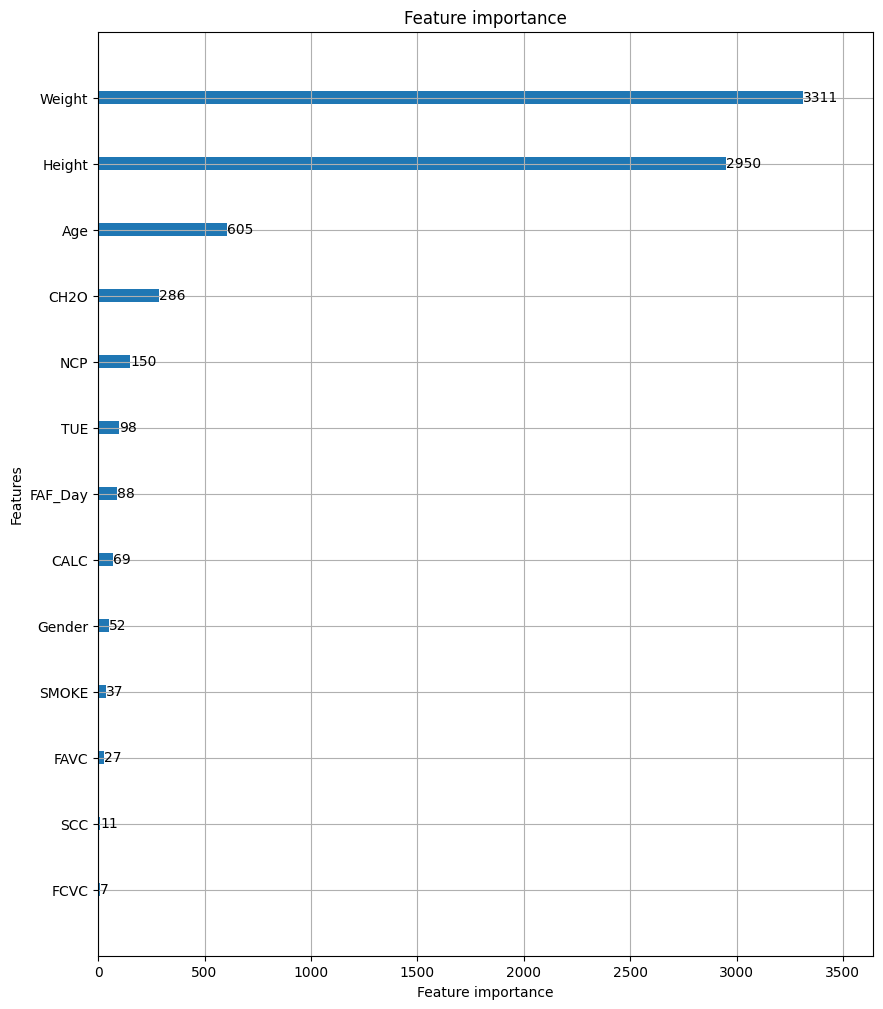

In [119]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

## 하이퍼 파라미터
그리드 서치의 경우 튜닝할 하이퍼 파라미터 개수가 많을 경우 최적화수행 시간이 오래걸린다는 단점이 있음. 이에, 베이지안 최적화를 하기위해 HyperOpt를 사용함

In [121]:
pip install hyperopt

In [136]:
!pip install scikit-learn

In [140]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
import numpy as np
from hyperopt import hp, fmin, Trials, tpe
from hyperopt import hp

# 하이퍼 파라미터에 대해 검색할 범위를 지정 -> 입력 변수명과 입력값의 검색 공간을 설정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 목적함수 생성 -> K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # 그리드 서치의 cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = roc_auc_score(l_val, lgbm_opt.predict_proba(L_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)


100%|██████████| 50/50 [02:45<00:00,  3.32s/trial, best loss: -0.9872484227389098]
Best hyperparameters: {'learning_rate': 0.1320016046698084, 'max_depth': 10.0, 'min_child_samples': 71.0, 'n_estimators': 300.0, 'num_leaves': 52.0, 'subsample': 0.911674546725651}


In [141]:
# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds = best_model.predict(L_test)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy = accuracy_score(l_test, final_preds)
precision = precision_score(l_test, final_preds, average='macro')
recall = recall_score(l_test, final_preds, average='macro')
f1 = f1_score(l_test, final_preds, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

오차 행렬 : 
[[ 43   6   0   0   0   0]
 [  5 368  13   0   0   0]
 [  0  12 179   9   0   0]
 [  0   0   7 250   5   0]
 [  0   0   0   6  44   3]
 [  0   0   0   0   2   7]]
정확도 : 0.9290928050052137
정밀도 : 0.8758066701454162
재현율 : 0.8813473043935559
F1 : 0.8781619127323309


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

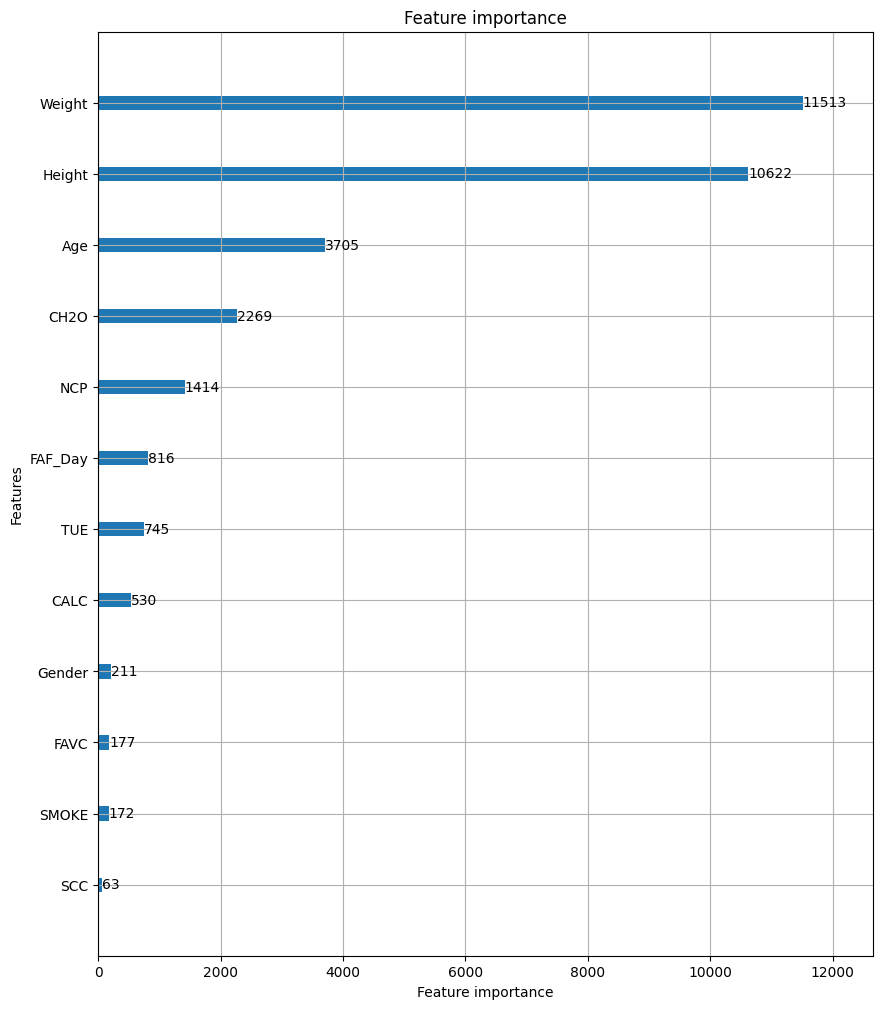

In [142]:
# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

## 체중 삭제하고 분석

In [143]:
L_train, L_test, l_train, l_test = train_test_split(
    k_obe.drop(['NObeyesdad', 'FAF_Time', 'Weight'], axis=1),
    k_obe['NObeyesdad'],
    random_state=42,
    stratify=k_obe['NObeyesdad']
)

L_train, L_valid, l_train, l_valid = train_test_split(
    L_train,
    l_train,
    random_state=42,
    stratify=l_train
)

L_train.shape, L_valid.shape, L_test.shape

((2157, 12), (719, 12), (959, 12))

[1]	training's multi_logloss: 1.34448	valid_1's multi_logloss: 1.3875
[2]	training's multi_logloss: 1.29851	valid_1's multi_logloss: 1.37368
[3]	training's multi_logloss: 1.26007	valid_1's multi_logloss: 1.36422
[4]	training's multi_logloss: 1.22441	valid_1's multi_logloss: 1.35852
[5]	training's multi_logloss: 1.1959	valid_1's multi_logloss: 1.35548
[6]	training's multi_logloss: 1.16706	valid_1's multi_logloss: 1.3543
[7]	training's multi_logloss: 1.14279	valid_1's multi_logloss: 1.3519
[8]	training's multi_logloss: 1.1214	valid_1's multi_logloss: 1.35185
[9]	training's multi_logloss: 1.09923	valid_1's multi_logloss: 1.35158
[10]	training's multi_logloss: 1.07816	valid_1's multi_logloss: 1.35242
[11]	training's multi_logloss: 1.05884	valid_1's multi_logloss: 1.35272
[12]	training's multi_logloss: 1.0404	valid_1's multi_logloss: 1.35328
[13]	training's multi_logloss: 1.02224	valid_1's multi_logloss: 1.35621
[14]	training's multi_logloss: 1.00552	valid_1's multi_logloss: 1.35936
[15]	tr

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

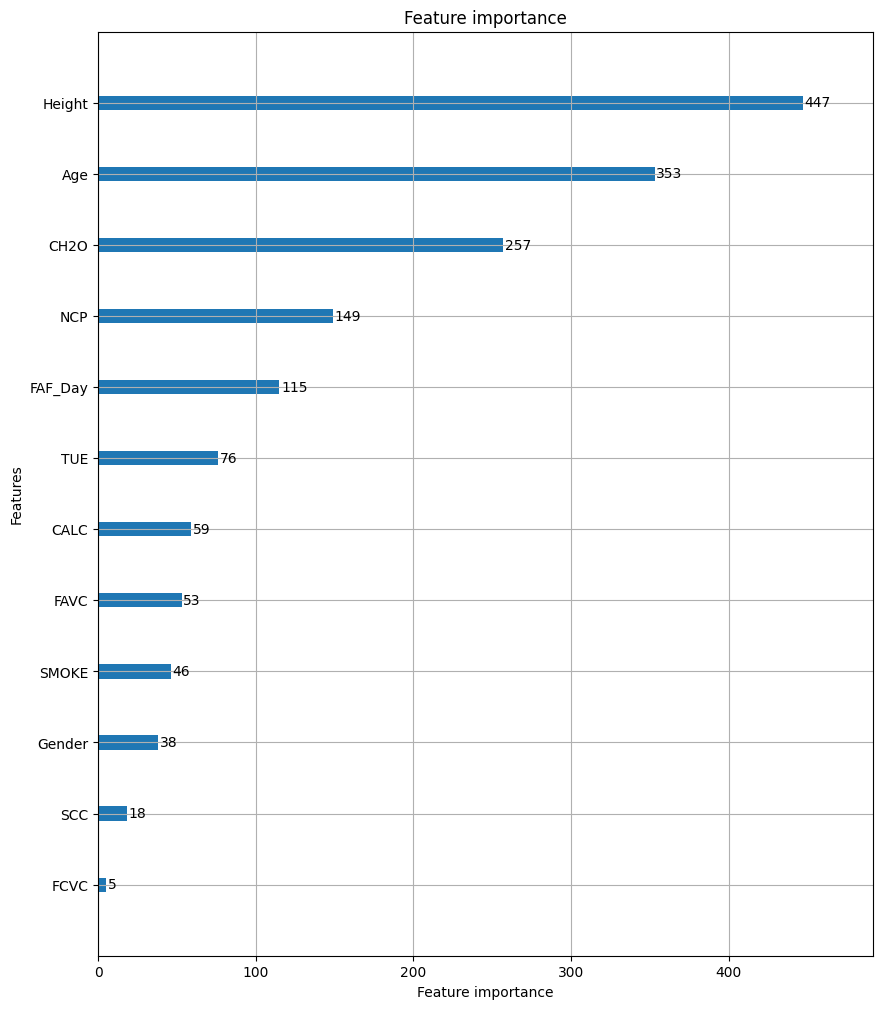

In [144]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

eval_sets = [
    (L_train, l_train),
    (L_valid, l_valid)
]

lgbm_clf.fit(
    L_train, l_train,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',
    eval_set=eval_sets,
    verbose=True
)

preds = lgbm_clf.predict(L_test)

# 오차행렬
from sklearn.metrics import confusion_matrix

l_matrix = confusion_matrix(l_test, preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 종속이 다중분류라 average를 'macro'를 부여
# https://data-minggeul.tistory.com/11 참고
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(preds, l_test)
precision = precision_score(preds, l_test, average='macro')
recall = recall_score(preds, l_test, average='macro')
f1 = f1_score(preds, l_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

100%|██████████| 50/50 [00:52<00:00,  1.04s/trial, best loss: -0.6149207816475154]
Best hyperparameters: {'learning_rate': 0.0740346310590174, 'max_depth': 3.0, 'min_child_samples': 86.0, 'n_estimators': 100.0, 'num_leaves': 44.0, 'subsample': 0.8571063669000286}
오차 행렬 : 
[[  0  41   3   5   0   0]
 [  0 285  20  81   0   0]
 [  1 104  18  76   1   0]
 [  1 119  18 124   0   0]
 [  1  26   2  24   0   0]
 [  1   2   0   6   0   0]]
정확도 : 0.44525547445255476
정밀도 : 0.19690352876977313
재현율 : 0.21693740194333477
F1 : 0.1931495149923125


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

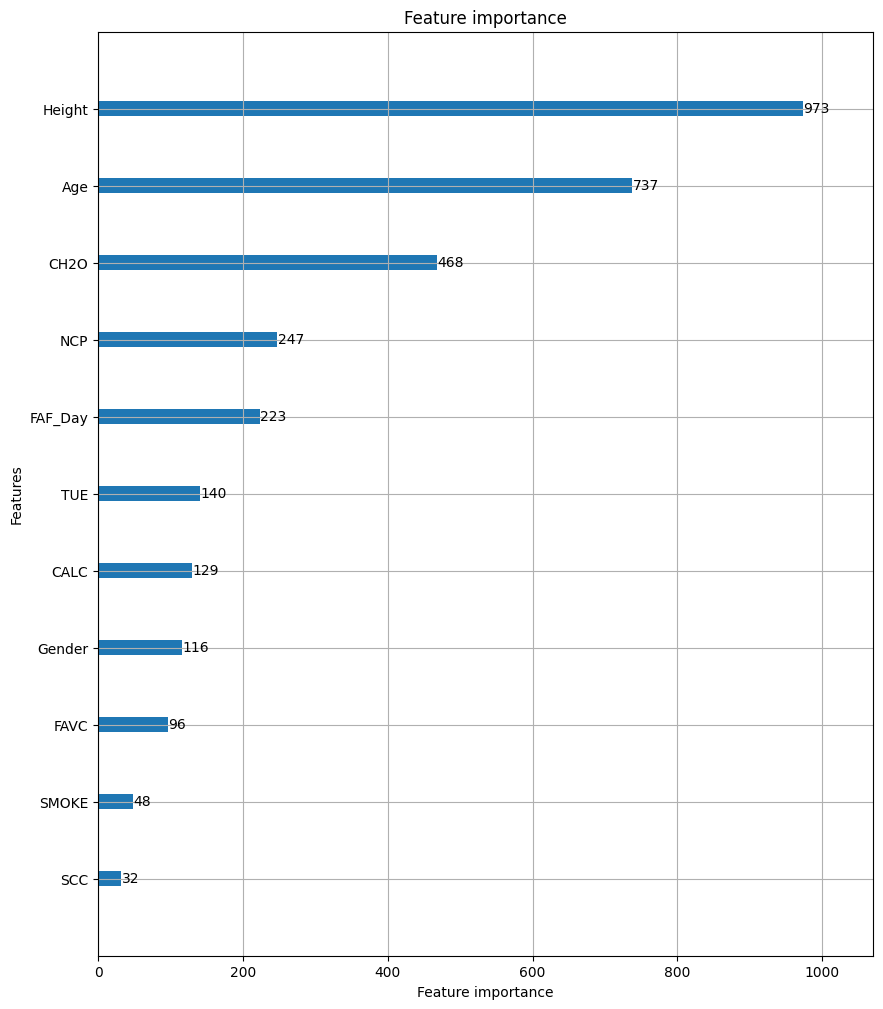

In [145]:
from hyperopt import hp

lgbm_seaerch_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 하이퍼 파라미터에 대해 검색할 범위를 지정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = roc_auc_score(l_val, lgbm_opt.predict_proba(L_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds = best_model.predict(L_test)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy = accuracy_score(l_test, final_preds)
precision = precision_score(l_test, final_preds, average='macro')
recall = recall_score(l_test, final_preds, average='macro')
f1 = f1_score(l_test, final_preds, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

## 둘다 삭제하고 보기

In [146]:
L_train, L_test, l_train, l_test = train_test_split(
    k_obe.drop(['NObeyesdad', 'FAF_Time', 'Weight', 'Height'], axis=1),
    k_obe['NObeyesdad'],
    random_state=42,
    stratify=k_obe['NObeyesdad']
)

L_train, L_valid, l_train, l_valid = train_test_split(
    L_train,
    l_train,
    random_state=42,
    stratify=l_train
)

L_train.shape, L_valid.shape, L_test.shape

((2157, 11), (719, 11), (959, 11))

[1]	training's multi_logloss: 1.35318	valid_1's multi_logloss: 1.38986
[2]	training's multi_logloss: 1.31177	valid_1's multi_logloss: 1.3757
[3]	training's multi_logloss: 1.27709	valid_1's multi_logloss: 1.3677
[4]	training's multi_logloss: 1.24932	valid_1's multi_logloss: 1.36242
[5]	training's multi_logloss: 1.22362	valid_1's multi_logloss: 1.35927
[6]	training's multi_logloss: 1.2012	valid_1's multi_logloss: 1.35641
[7]	training's multi_logloss: 1.1801	valid_1's multi_logloss: 1.35348
[8]	training's multi_logloss: 1.1597	valid_1's multi_logloss: 1.3523
[9]	training's multi_logloss: 1.14123	valid_1's multi_logloss: 1.35246
[10]	training's multi_logloss: 1.12335	valid_1's multi_logloss: 1.35334
[11]	training's multi_logloss: 1.10776	valid_1's multi_logloss: 1.35396
[12]	training's multi_logloss: 1.09231	valid_1's multi_logloss: 1.3547
[13]	training's multi_logloss: 1.07748	valid_1's multi_logloss: 1.35658
[14]	training's multi_logloss: 1.06333	valid_1's multi_logloss: 1.35804
[15]	tra

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

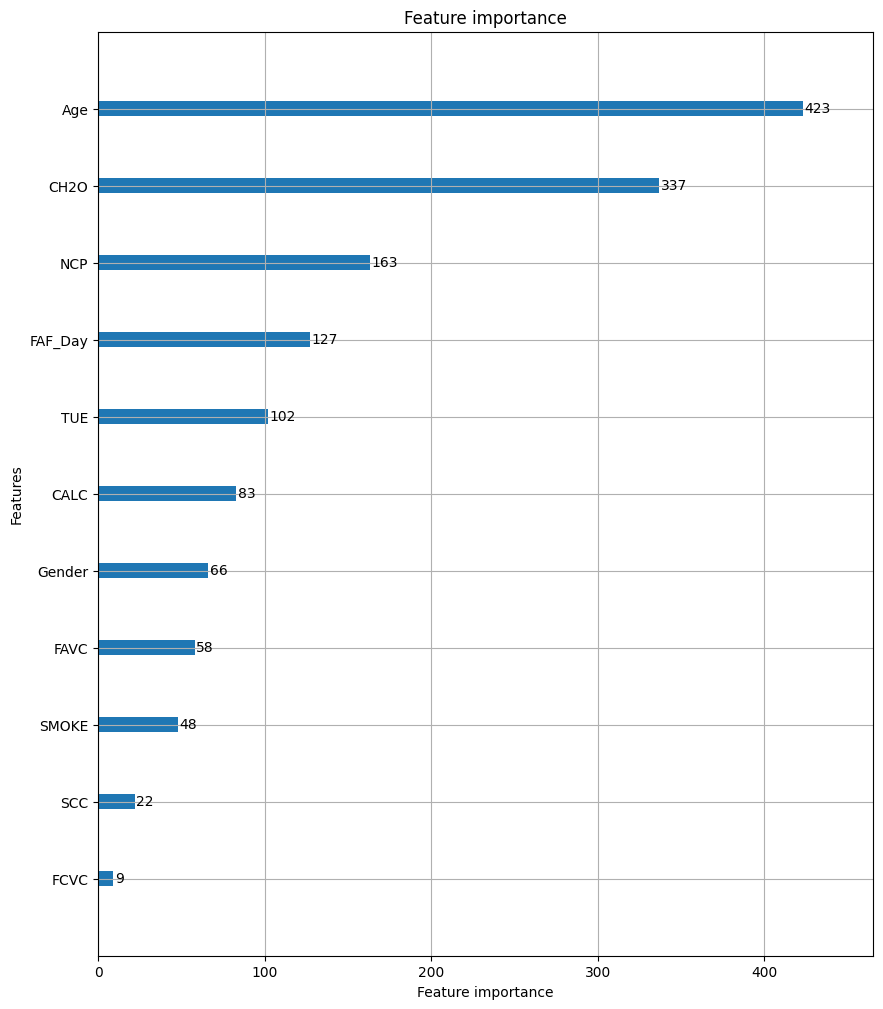

In [147]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

eval_sets = [
    (L_train, l_train),
    (L_valid, l_valid)
]

lgbm_clf.fit(
    L_train, l_train,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',
    eval_set=eval_sets,
    verbose=True
)

preds = lgbm_clf.predict(L_test)

# 오차행렬
from sklearn.metrics import confusion_matrix

l_matrix = confusion_matrix(l_test, preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 종속이 다중분류라 average를 'macro'를 부여
# https://data-minggeul.tistory.com/11 참고
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(preds, l_test)
precision = precision_score(preds, l_test, average='macro')
recall = recall_score(preds, l_test, average='macro')
f1 = f1_score(preds, l_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

100%|██████████| 50/50 [00:33<00:00,  1.50trial/s, best loss: -0.6011671183785817]
Best hyperparameters: {'learning_rate': 0.1413685943445535, 'max_depth': 5.0, 'min_child_samples': 77.0, 'n_estimators': 700.0, 'num_leaves': 47.0, 'subsample': 0.7867459590129969}
오차 행렬 : 
[[  4  26  12   5   2   0]
 [ 11 217  63  85  10   0]
 [  4  87  35  63  11   0]
 [  6  97  59  87  11   2]
 [  2  18  11  18   3   1]
 [  0   1   4   3   1   0]]
정확도 : 0.3607924921793535
정밀도 : 0.20619888773477926
재현율 : 0.20124561019192147
F1 : 0.2013032484306196


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

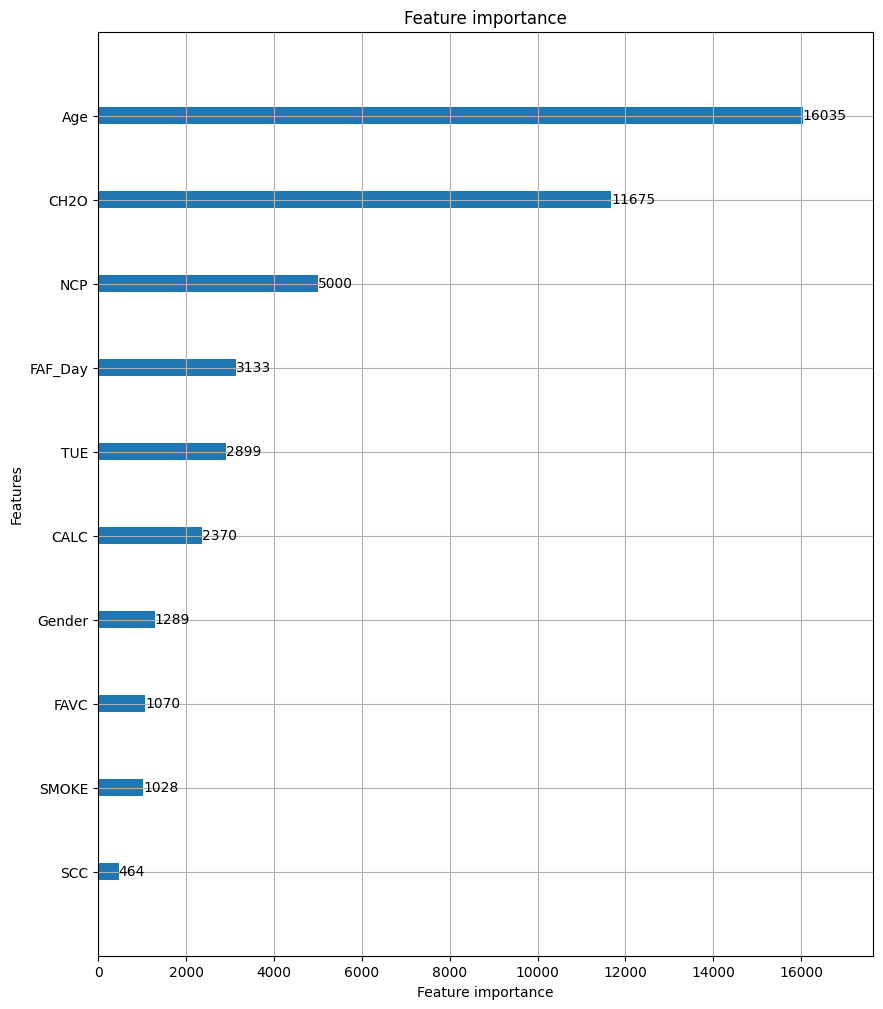

In [148]:
from hyperopt import hp

lgbm_seaerch_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 하이퍼 파라미터에 대해 검색할 범위를 지정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = roc_auc_score(l_val, lgbm_opt.predict_proba(L_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds = best_model.predict(L_test)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy = accuracy_score(l_test, final_preds)
precision = precision_score(l_test, final_preds, average='macro')
recall = recall_score(l_test, final_preds, average='macro')
f1 = f1_score(l_test, final_preds, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)

## 신장만 제거

In [149]:
L_train, L_test, l_train, l_test = train_test_split(
    k_obe.drop(['NObeyesdad', 'FAF_Time', 'Height'], axis=1),
    k_obe['NObeyesdad'],
    random_state=42,
    stratify=k_obe['NObeyesdad']
)

L_train, L_valid, l_train, l_valid = train_test_split(
    L_train,
    l_train,
    random_state=42,
    stratify=l_train
)

L_train.shape, L_valid.shape, L_test.shape

((2157, 12), (719, 12), (959, 12))

[1]	training's multi_logloss: 1.19596	valid_1's multi_logloss: 1.24368
[2]	training's multi_logloss: 1.08014	valid_1's multi_logloss: 1.14281
[3]	training's multi_logloss: 0.992569	valid_1's multi_logloss: 1.0782
[4]	training's multi_logloss: 0.922477	valid_1's multi_logloss: 1.02278
[5]	training's multi_logloss: 0.863494	valid_1's multi_logloss: 0.978752
[6]	training's multi_logloss: 0.815343	valid_1's multi_logloss: 0.943197
[7]	training's multi_logloss: 0.772682	valid_1's multi_logloss: 0.912067
[8]	training's multi_logloss: 0.736145	valid_1's multi_logloss: 0.889791
[9]	training's multi_logloss: 0.704108	valid_1's multi_logloss: 0.869758
[10]	training's multi_logloss: 0.676508	valid_1's multi_logloss: 0.854996
[11]	training's multi_logloss: 0.650868	valid_1's multi_logloss: 0.841288
[12]	training's multi_logloss: 0.628928	valid_1's multi_logloss: 0.830207
[13]	training's multi_logloss: 0.609675	valid_1's multi_logloss: 0.82119
[14]	training's multi_logloss: 0.589567	valid_1's multi

<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

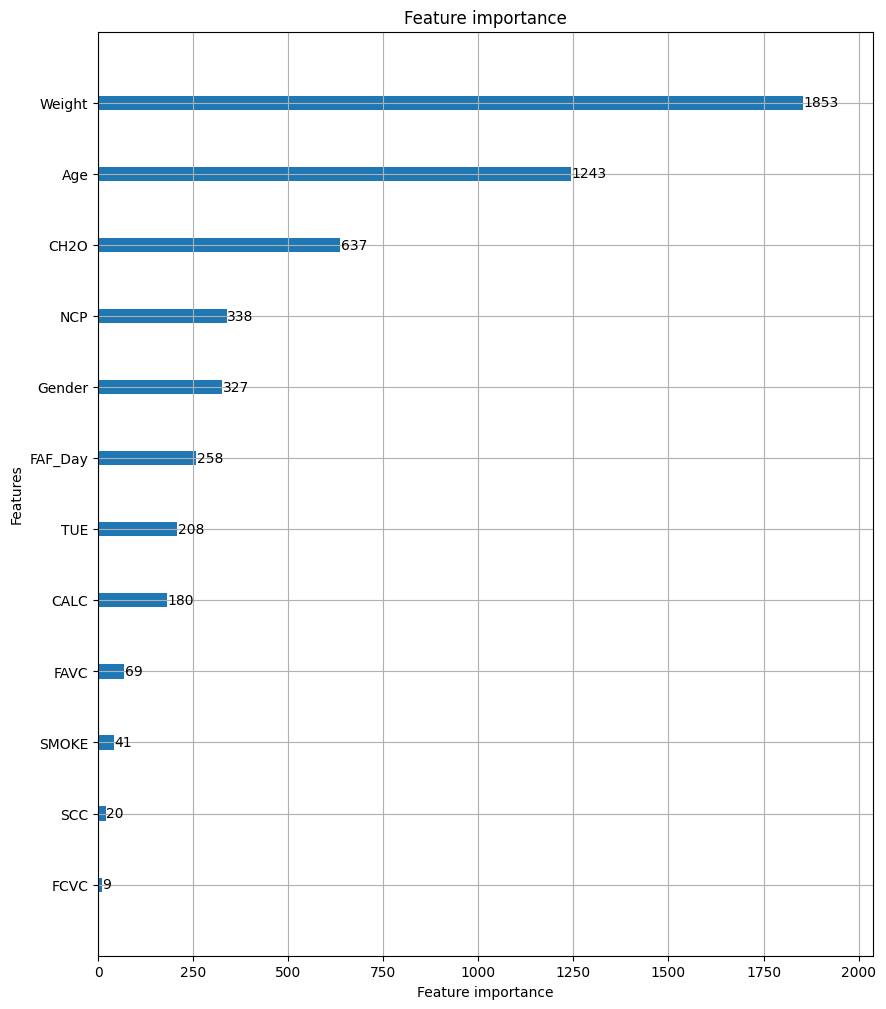

In [150]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
    n_estimators=400,
    learning_rate=0.1
)

eval_sets = [
    (L_train, l_train),
    (L_valid, l_valid)
]

lgbm_clf.fit(
    L_train, l_train,
    early_stopping_rounds=50,
    eval_metric='multi_logloss',
    eval_set=eval_sets,
    verbose=True
)

preds = lgbm_clf.predict(L_test)

# 오차행렬
from sklearn.metrics import confusion_matrix

l_matrix = confusion_matrix(l_test, preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 종속이 다중분류라 average를 'macro'를 부여
# https://data-minggeul.tistory.com/11 참고
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy = accuracy_score(preds, l_test)
precision = precision_score(preds, l_test, average='macro')
recall = recall_score(preds, l_test, average='macro')
f1 = f1_score(preds, l_test, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))

# 모델의 특성 중요도 확인
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_clf, ax=ax)

100%|██████████| 50/50 [01:05<00:00,  1.31s/trial, best loss: -0.9167798251034253]
Best hyperparameters: {'learning_rate': 0.10364165819107905, 'max_depth': 4.0, 'min_child_samples': 88.0, 'n_estimators': 400.0, 'num_leaves': 39.0, 'subsample': 0.8960943771395242}
오차 행렬 : 
[[ 24  25   0   0   0   0]
 [ 16 303  56  11   0   0]
 [  0  67  83  50   0   0]
 [  0  17  41 190  14   0]
 [  0   0   0  20  29   4]
 [  0   0   0   0   4   5]]
정확도 : 0.6611053180396246
정밀도 : 0.6117053079227343
재현율 : 0.5862810363670937
F1 : 0.597344598458386


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

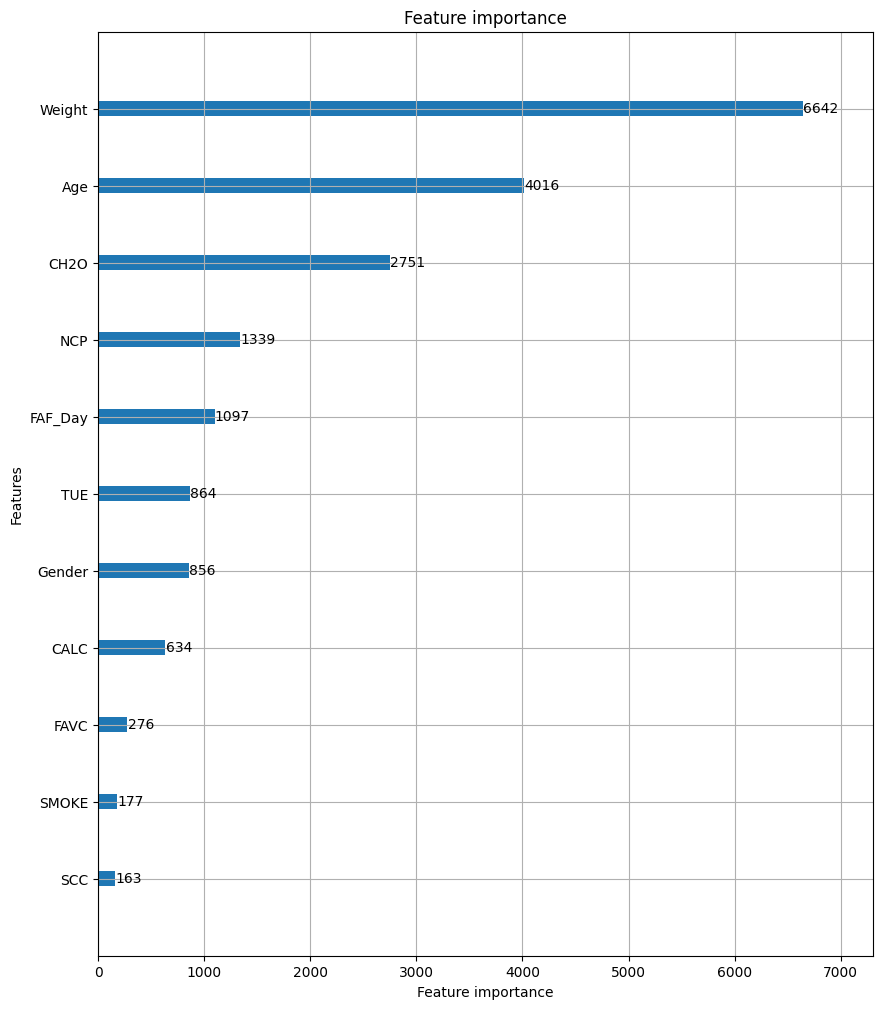

In [151]:
from hyperopt import hp

lgbm_seaerch_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# 하이퍼 파라미터에 대해 검색할 범위를 지정
lgbm_search_space = {
    'num_leaves': hp.quniform('num_leaves', 32, 64, 1),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'min_child_samples': hp.quniform('min_child_samples', 60, 100, 1),
    'subsample': hp.uniform('subsample', 0.7, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 100)
}

# K-fold 교차 검증을 수행해 각 폴드에서 모델을 학습하고 검증. 이후 검증세트에 대한 ROC AUC 점수의 평균을 반환함
def objective_func(search_space):
    lgbm_opt = LGBMClassifier(
        random_state=42,
        num_leaves=int(search_space['num_leaves']),
        max_depth=int(search_space['max_depth']),
        min_child_samples=int(search_space['min_child_samples']),
        subsample=search_space['subsample'],
        learning_rate=search_space['learning_rate'],
        n_estimators=int(search_space['n_estimators']),
        n_jobs=-1,
        objective='multiclass'  # 다중 분류 문제 설정
    )

    roc_auc_list = []

    # cv=3의 역할
    kf = KFold(n_splits=3)
    for tr_index, val_index in kf.split(L_train):
        L_tr, l_tr = L_train.iloc[tr_index], l_train.iloc[tr_index]
        L_val, l_val = L_train.iloc[val_index], l_train.iloc[val_index]

        lgbm_opt.fit(
            L_tr,
            l_tr,
            early_stopping_rounds=50,
            eval_set=[(L_tr, l_tr), (L_val, l_val)],
            eval_metric='multi_logloss',
            # objective='multi:softmax', # lgbm에서 자동으로 다중분류를 지원함
            verbose=False  # 출력을 최소화합니다.
        )

        score = roc_auc_score(l_val, lgbm_opt.predict_proba(L_val), multi_class='ovr')
        roc_auc_list.append(score)

    return -1 * np.mean(roc_auc_list)

# 하이퍼파라미터 최적화
trials = Trials()
best = fmin(fn=objective_func, # Hyperopt의 함수인 'fmin'을 통해 최적화 수행하고 fn에 목적함수를 삽입
            space=lgbm_search_space, # 하이퍼파라미터 탐색 공간을 삽입
            algo=tpe.suggest, # 최적화 알고리즘 삽
            max_evals=50,
            trials=trials,
            rstate=np.random.default_rng(seed=30))

print("Best hyperparameters:", best)

# 최적의 하이퍼파라미터를 사용하여 모델 학습
best_model = LGBMClassifier(
    num_leaves=int(best['num_leaves']),
    max_depth=int(best['max_depth']),
    min_child_samples=int(best['min_child_samples']),
    subsample=best['subsample'],
    learning_rate=best['learning_rate'],
    n_estimators=int(best['n_estimators']),
    random_state=42,
    objective='multiclass'
)
best_model.fit(L_train, l_train)

# 모델을 사용하여 예측 수행
final_preds = best_model.predict(L_test)

# 오차 행렬 계산
y_matrix = confusion_matrix(l_test, final_preds)
print("오차 행렬 : \n{}".format(y_matrix))

# 성능 평가하기
accuracy = accuracy_score(l_test, final_preds)
precision = precision_score(l_test, final_preds, average='macro')
recall = recall_score(l_test, final_preds, average='macro')
f1 = f1_score(l_test, final_preds, average='macro')

print("정확도 : {}".format(accuracy))
print("정밀도 : {}".format(precision))
print("재현율 : {}".format(recall))
print("F1 : {}".format(f1))


fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(best_model, ax=ax)